In [1]:
import pandas as pd
import numpy as np
from scipy.stats import expon, erlang, poisson
import matplotlib.pyplot as plt
import scipy.stats as stats

entrada_df = pd.read_csv('/Users/abdalrhman/Documents/preparationphase/prepared_data/cleaned/P10_Entrada_de_material.csv')
entrada_df.head()

,Fecha de seguimiento,Hora de seguimiento,Usuario,Nombre punto de control,Es preliminar,Es físico,Es denegado,Cant.,Tipo de objeto,Código,N/S,Nombre / Descripción,Tipo de producción,Nombre producción,Información adicional
0,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-OFT.002,10.0,Catarata 10,NaN,NaN,NaN
1,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-OFT.002,19.0,Catarata 19,NaN,NaN,NaN
2,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-CPL.002,5.0,Mano 05,NaN,NaN,NaN
3,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-CG.001,7.0,Laparotomia 07,NaN,NaN,NaN
4,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,EQP-QUI.OFT.002,3.0,FACO INFINITI 03,NaN,NaN,NaN


In [2]:
entrada_df['datetime_string'] = entrada_df['Fecha de seguimiento'] + ' ' + entrada_df['Hora de seguimiento']

entrada_df['timestamp'] = pd.to_datetime(entrada_df['datetime_string'], format='%d/%m/%Y %H:%M')
entrada_df.head()


,Fecha de seguimiento,Hora de seguimiento,Usuario,Nombre punto de control,Es preliminar,Es físico,Es denegado,Cant.,Tipo de objeto,Código,N/S,Nombre / Descripción,Tipo de producción,Nombre producción,Información adicional,datetime_string,timestamp
0,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-OFT.002,10.0,Catarata 10,NaN,NaN,NaN,31/03/2022 20:30,2022-03-31 20:30:00
1,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-OFT.002,19.0,Catarata 19,NaN,NaN,NaN,31/03/2022 20:30,2022-03-31 20:30:00
2,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-CPL.002,5.0,Mano 05,NaN,NaN,NaN,31/03/2022 20:30,2022-03-31 20:30:00
3,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,HNB-CG.001,7.0,Laparotomia 07,NaN,NaN,NaN,31/03/2022 20:30,2022-03-31 20:30:00
4,31/03/2022,20:30,MMF,Entrada Material Sucio,NaN,NaN,NaN,1,Set,EQP-QUI.OFT.002,3.0,FACO INFINITI 03,NaN,NaN,NaN,31/03/2022 20:30,2022-03-31 20:30:00


Arrival Rate: 0.019154859673204135 cases per minute


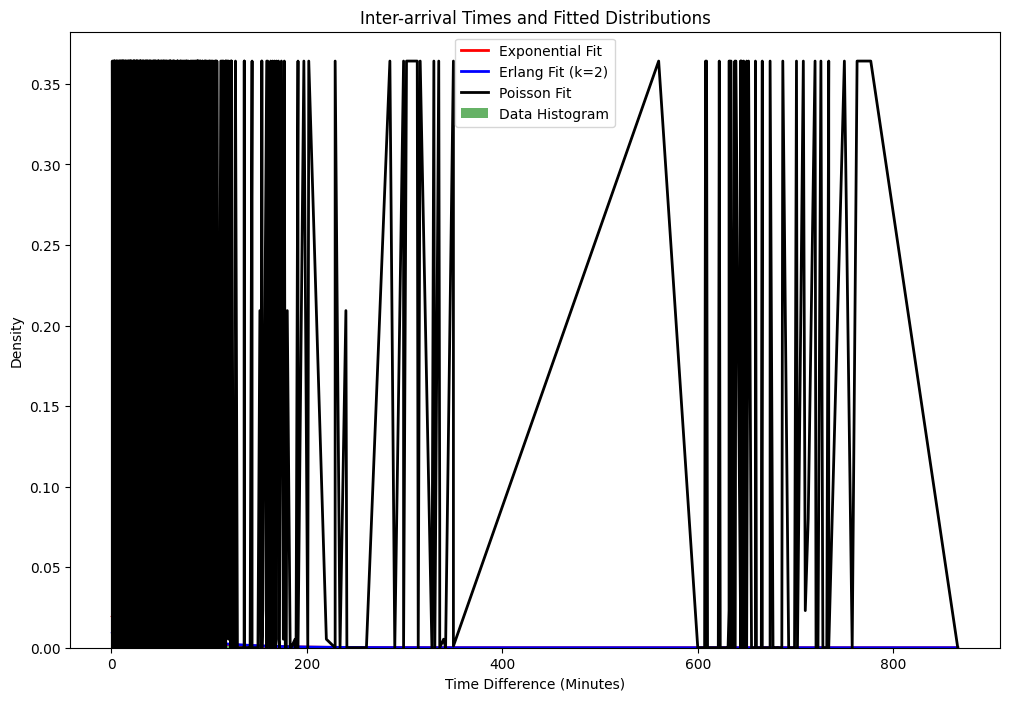

In [3]:

entrada_df = entrada_df.sort_values(by=['timestamp'])
entrada_df['time_diff'] = entrada_df['timestamp'].diff().dt.total_seconds() / 60.0  

inter_arrival_times = entrada_df['time_diff'].dropna()
inter_arrival_times = inter_arrival_times[inter_arrival_times > 0]

arrival_rate = 1 / inter_arrival_times.mean()
print(f"Arrival Rate: {arrival_rate} cases per minute")

expon_fit = expon.fit(inter_arrival_times)
expon_pdf = expon.pdf(np.sort(inter_arrival_times), *expon_fit)

erlang_fit = erlang.fit(inter_arrival_times, f0=2)  
erlang_pdf = erlang.pdf(np.sort(inter_arrival_times), *erlang_fit)

poisson_fit = poisson.pmf(np.round(inter_arrival_times), mu=arrival_rate * 60) 

plt.figure(figsize=(12, 8))
plt.hist(inter_arrival_times, bins=20, density=True, alpha=0.6, color='g', label='Data Histogram')

plt.plot(np.sort(inter_arrival_times), expon_pdf, 'r-', lw=2, label='Exponential Fit')
plt.plot(np.sort(inter_arrival_times), erlang_pdf, 'b-', lw=2, label='Erlang Fit (k=2)')
plt.plot(np.sort(inter_arrival_times), poisson_fit, 'k-', lw=2, label='Poisson Fit')

plt.title('Inter-arrival Times and Fitted Distributions')
plt.xlabel('Time Difference (Minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()


In [4]:
entrada_df['hour'] = entrada_df['timestamp'].dt.hour
operating_df = entrada_df[(entrada_df['hour'] >= 7) & (entrada_df['hour'] < 22)]

operating_df['date'] = operating_df['timestamp'].dt.date
operating_df = operating_df.sort_values(by='timestamp')
operating_df['inter_arrival_time'] = operating_df.groupby('date')['timestamp'].diff().dt.total_seconds() / 60

operating_df = operating_df.dropna(subset=['inter_arrival_time'])

total_cases = len(operating_df)
total_days = operating_df['date'].nunique()
total_operating_time_minutes = total_days * 15 * 60 

arrival_rate = total_cases / total_operating_time_minutes
print(f"Arrival Rate: {arrival_rate} cases per minute")

Arrival Rate: 0.16233333333333333 cases per minute


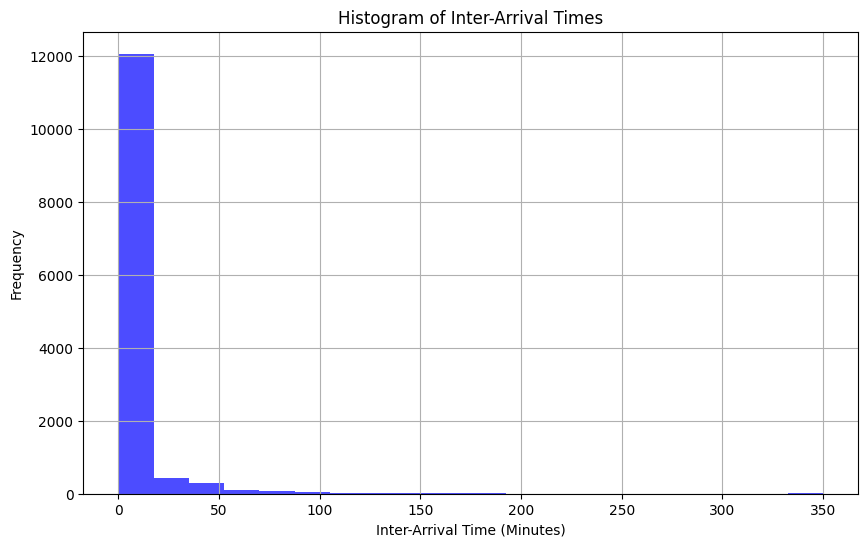

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(operating_df['inter_arrival_time'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Inter-Arrival Times')
plt.xlabel('Inter-Arrival Time (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
def calculate_arrival_rate(group_df, label):
    group_df = group_df.sort_values(by='timestamp')
    group_df['inter_arrival_time'] = group_df.groupby('date')['timestamp'].diff().dt.total_seconds() / 60
    group_df = group_df.dropna(subset=['inter_arrival_time'])

    total_cases = len(group_df)
    total_days = group_df['date'].nunique()
    total_operating_time_minutes = total_days * 15 * 60  

    arrival_rate = total_cases / total_operating_time_minutes
    print(f"{label} Arrival Rate: {arrival_rate:.6f} cases per minute")

    cases_per_day = group_df.groupby('date').size()
    print(f"{label} Cases per Day:")
    print(cases_per_day)

    return group_df


Weekday Arrival Rate: 0.215729 cases per minute
Weekday Cases per Day:
date
2022-01-03    140
2022-01-04    120
2022-01-05    127
2022-01-06     23
2022-01-07    105
             ... 
2022-03-25    186
2022-03-28    260
2022-03-29    248
2022-03-30    234
2022-03-31    258
Length: 64, dtype: int64
Weekend Arrival Rate: 0.030897 cases per minute
Weekend Cases per Day:
date
2022-01-01    23
2022-01-02    27
2022-01-08    17
2022-01-09    28
2022-01-15    24
2022-01-16    30
2022-01-22    34
2022-01-23    27
2022-01-29    27
2022-01-30    26
2022-02-05    27
2022-02-06    30
2022-02-12    24
2022-02-13    23
2022-02-19    30
2022-02-20    27
2022-02-26    32
2022-02-27    38
2022-03-05    24
2022-03-06    34
2022-03-12    24
2022-03-13    35
2022-03-19    29
2022-03-20    23
2022-03-26    33
2022-03-27    27
dtype: int64


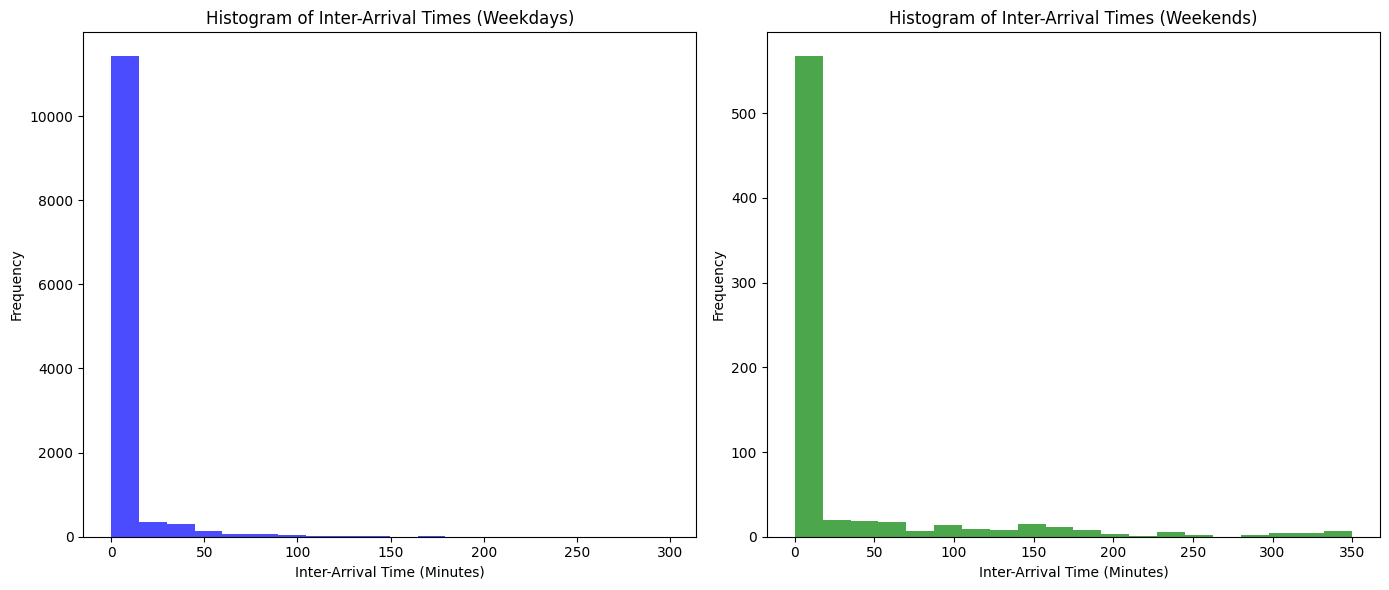

In [7]:
entrada_df['dayofweek'] = entrada_df['timestamp'].dt.dayofweek
entrada_df['date'] = entrada_df['timestamp'].dt.date

weekday_df = entrada_df[entrada_df['dayofweek'] < 5]
weekend_df = entrada_df[entrada_df['dayofweek'] >= 5]

weekday_df = calculate_arrival_rate(weekday_df, "Weekday")
weekend_df = calculate_arrival_rate(weekend_df, "Weekend")

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(weekday_df['inter_arrival_time'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Inter-Arrival Times (Weekdays)')
plt.xlabel('Inter-Arrival Time (Minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(weekend_df['inter_arrival_time'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Inter-Arrival Times (Weekends)')
plt.xlabel('Inter-Arrival Time (Minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

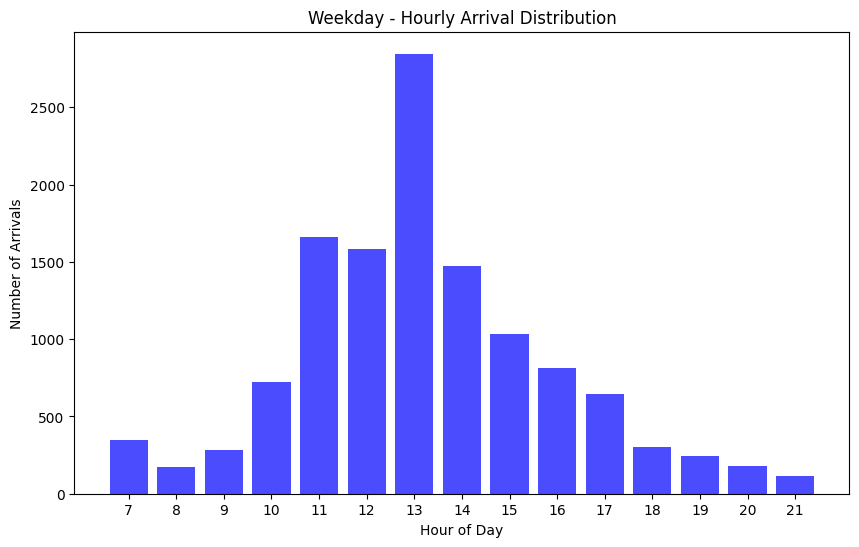

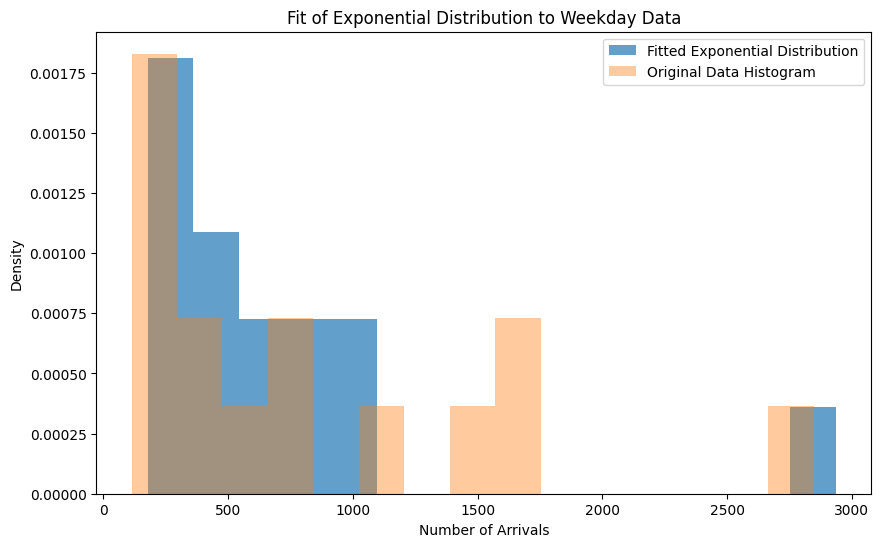

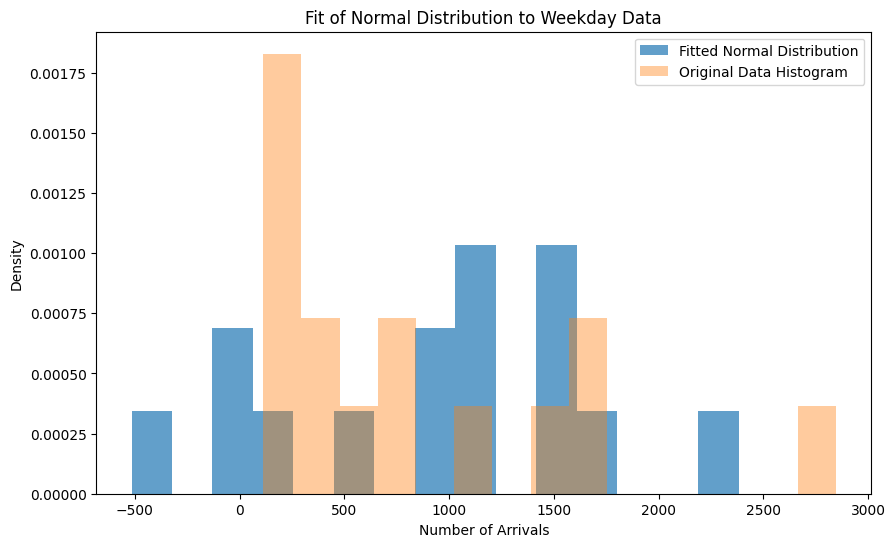

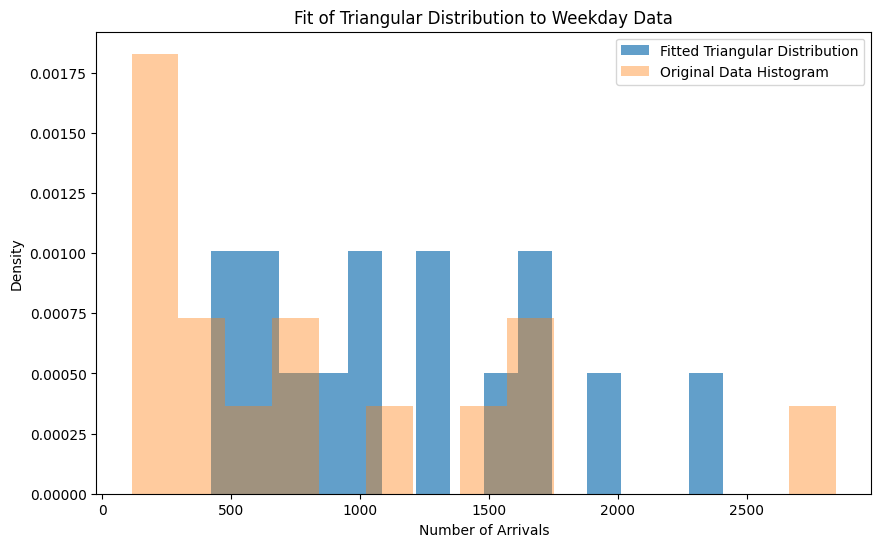

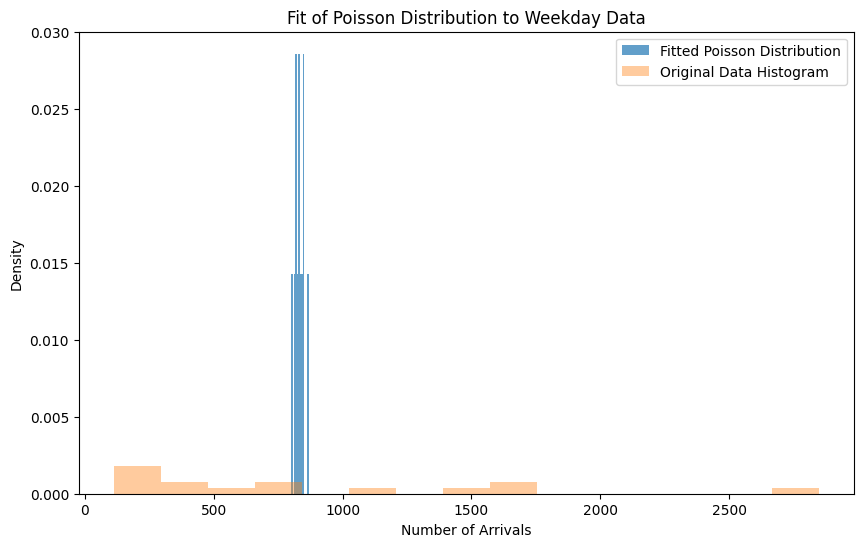

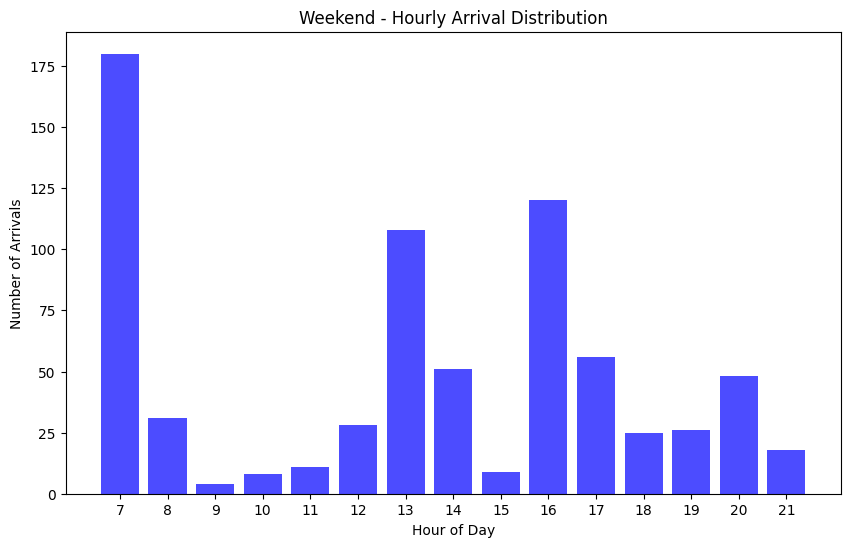

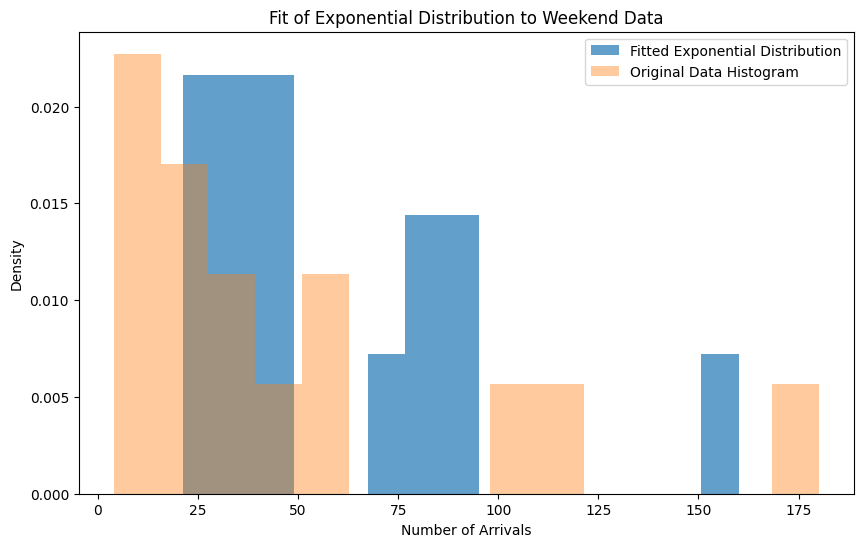

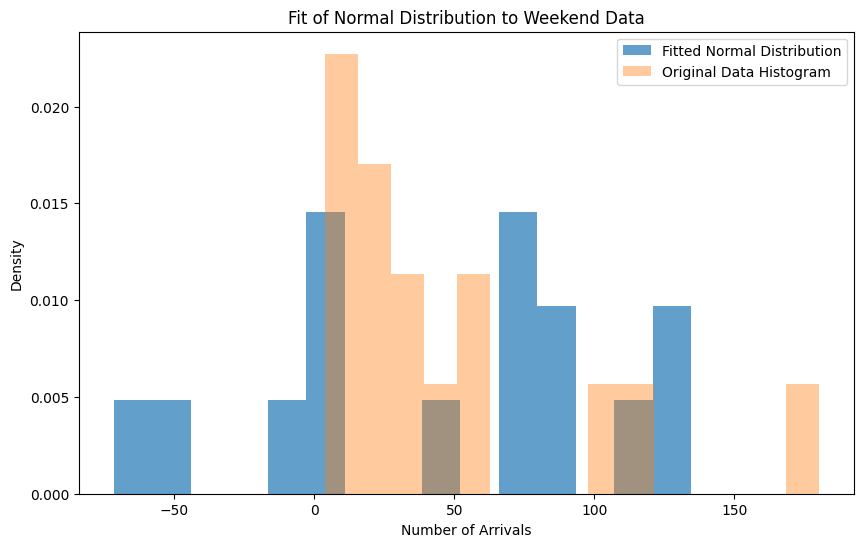

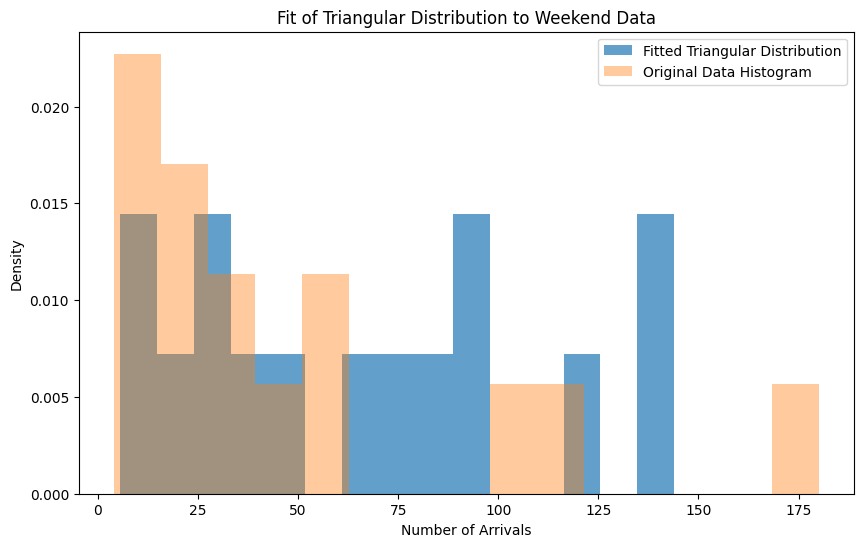

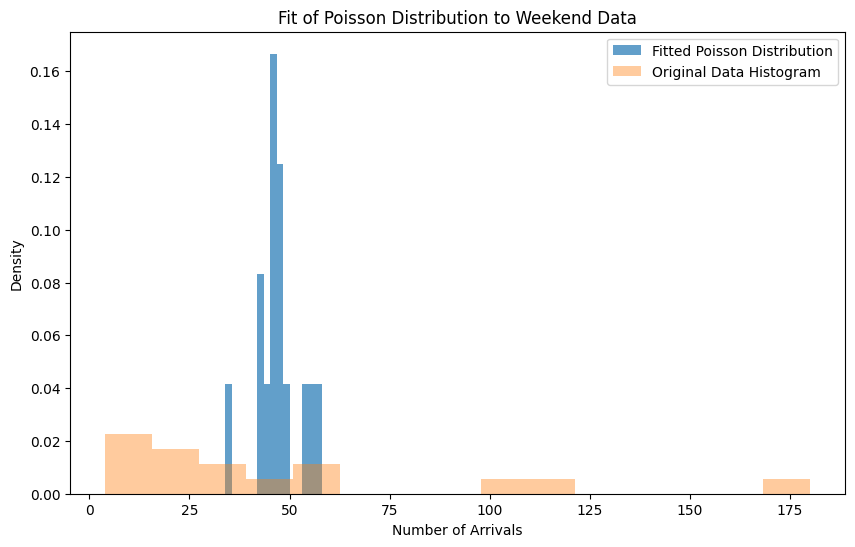

In [8]:
def plot_arrival_distribution(group_df, label):

    hourly_arrivals = group_df.groupby('hour').size()


    plt.figure(figsize=(10, 6))
    plt.bar(hourly_arrivals.index, hourly_arrivals.values, color='blue', alpha=0.7)
    plt.title(f'{label} - Hourly Arrival Distribution')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Arrivals')
    plt.xticks(np.arange(7, 22, 1))
    plt.show()


    data = hourly_arrivals.values

    distributions = {
        'Exponential': stats.expon,
        'Normal': stats.norm,
        'Triangular': stats.triang,

    }

    for name, distribution in distributions.items():

        params = distribution.fit(data)

        fitted_data = distribution.rvs(*params, size=len(data))

        plt.figure(figsize=(10, 6))
        plt.hist(fitted_data, bins=15, density=True, alpha=0.7, label=f'Fitted {name} Distribution')
        plt.hist(data, bins=15, density=True, alpha=0.4, label='Original Data Histogram')
        plt.title(f'Fit of {name} Distribution to {label} Data')
        plt.xlabel('Number of Arrivals')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

    lambda_poisson = np.mean(data)
    poisson_data = stats.poisson.rvs(mu=lambda_poisson, size=len(data))

    plt.figure(figsize=(10, 6))
    plt.hist(poisson_data, bins=15, density=True, alpha=0.7, label='Fitted Poisson Distribution')
    plt.hist(data, bins=15, density=True, alpha=0.4, label='Original Data Histogram')
    plt.title(f'Fit of Poisson Distribution to {label} Data')
    plt.xlabel('Number of Arrivals')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

plot_arrival_distribution(weekday_df, "Weekday")
plot_arrival_distribution(weekend_df, "Weekend")


In [9]:
def evaluate_distribution_fits(data):
    distributions = {
        'Exponential': stats.expon,
        'Normal': stats.norm,
        'Triangular': stats.triang,
        'Poisson': stats.poisson,  
    }

    results = []

    for name, distribution in distributions.items():
        if name == 'Poisson':

            lambda_poisson = np.mean(data)

            observed_freq, bin_edges = np.histogram(data, bins=np.arange(0, data.max()+2))
            expected_freq = stats.poisson.pmf(np.arange(len(observed_freq)), lambda_poisson) * len(data)
            
            expected_freq = expected_freq * (observed_freq.sum() / expected_freq.sum())
            
            chi_square, p_value = stats.chisquare(f_obs=observed_freq, f_exp=expected_freq)
            results.append((name, chi_square, p_value, lambda_poisson))
        else:
            params = distribution.fit(data)

            ks_stat, p_value = stats.kstest(data, distribution.cdf, args=params)
            results.append((name, ks_stat, p_value, params))

    return results

In [10]:
def print_results(results):
    print("Distribution Fitting Results:")
    for name, stat, p_value, params in results:
        print(f"{name}: Stat={stat:.4f}, p-value={p_value:.4f}, Parameters={params}")
    
    best_fit = min(results, key=lambda x: x[1])
    print("\nBest fitting distribution:")
    print(f"{best_fit[0]} with parameters {best_fit[3]}")
    
    return best_fit


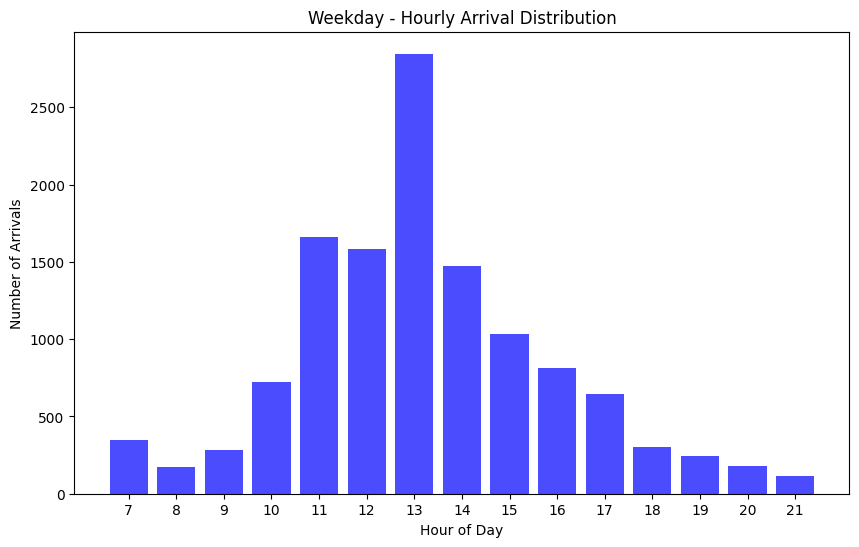

Distribution Fitting Results:
Exponential: Stat=0.1887, p-value=0.5945, Parameters=(113.0, 715.4)
Normal: Stat=0.2077, p-value=0.4746, Parameters=(828.4, 746.0859467916548)
Triangular: Stat=0.3170, p-value=0.0772, Parameters=(1.5093339605880845e-09, 112.99999547794675, 2991.8979398649753)
Poisson: Stat=nan, p-value=nan, Parameters=828.4

Best fitting distribution:
Exponential with parameters (113.0, 715.4)


/Users/abdalrhman/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/abdalrhman/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:7407: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


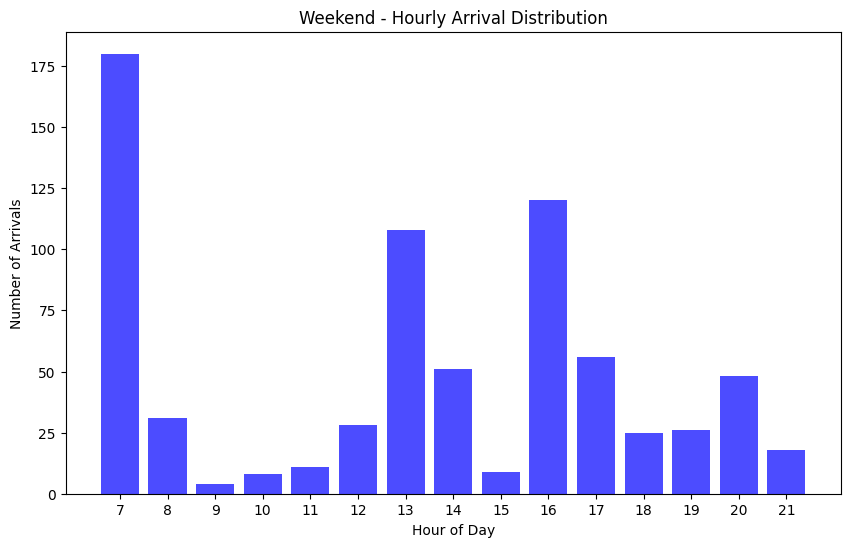

Distribution Fitting Results:
Exponential: Stat=0.1429, p-value=0.8779, Parameters=(4.0, 44.2)
Normal: Stat=0.2385, p-value=0.3093, Parameters=(48.2, 48.51693862284937)
Triangular: Stat=0.3622, p-value=0.0286, Parameters=(6.444241879804956e-08, 3.9999814678360384, 207.82648374485177)
Poisson: Stat=12924308336689854443744199258376426345755312128.0000, p-value=0.0000, Parameters=48.2

Best fitting distribution:
Exponential with parameters (4.0, 44.2)


In [11]:

def plot_arrival_distribution_and_evaluate(group_df, label):

    hourly_arrivals = group_df.groupby('hour').size()

    plt.figure(figsize=(10, 6))
    plt.bar(hourly_arrivals.index, hourly_arrivals.values, color='blue', alpha=0.7)
    plt.title(f'{label} - Hourly Arrival Distribution')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Arrivals')
    plt.xticks(np.arange(7, 22, 1))
    plt.show()

    data = hourly_arrivals.values
    results = evaluate_distribution_fits(data)
    best_fit = print_results(results)
    
    return best_fit

best_weekday_fit = plot_arrival_distribution_and_evaluate(weekday_df, "Weekday")
best_weekend_fit = plot_arrival_distribution_and_evaluate(weekend_df, "Weekend")


In [12]:
def print_results(results):
    print("Distribution Fitting Results:")
    for name, stat, p_value, params in results:
        print(f"{name}: Stat={stat:.4f}, p-value={p_value:.4f}, Parameters={params}")
    
    best_fit = min(results, key=lambda x: x[1])
    print("\nBest fitting distribution:")
    print(f"{best_fit[0]} with parameters {best_fit[3]}")
    
    if best_fit[0] == 'Poisson':
        mean_value = best_fit[3]
    elif best_fit[0] == 'Exponential':
        mean_value = best_fit[3][1]
    else:
        mean_value = np.mean(data)
    
    print(f"The mean of the best fitting distribution ({best_fit[0]}) is: {mean_value}")
    
    return best_fit, mean_value


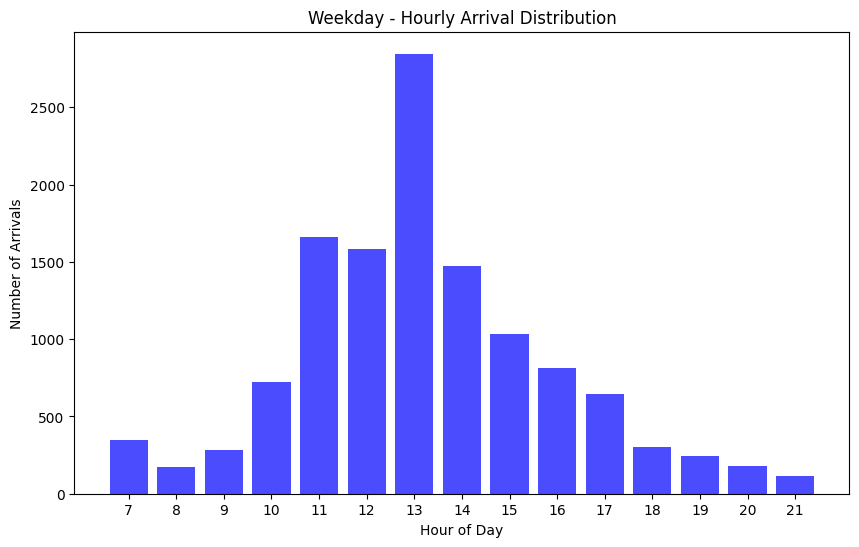

Distribution Fitting Results:
Exponential: Stat=0.1887, p-value=0.5945, Parameters=(113.0, 715.4)
Normal: Stat=0.2077, p-value=0.4746, Parameters=(828.4, 746.0859467916548)
Triangular: Stat=0.3170, p-value=0.0772, Parameters=(1.5093339605880845e-09, 112.99999547794675, 2991.8979398649753)
Poisson: Stat=nan, p-value=nan, Parameters=828.4

Best fitting distribution:
Exponential with parameters (113.0, 715.4)
The mean of the best fitting distribution (Exponential) is: 715.4


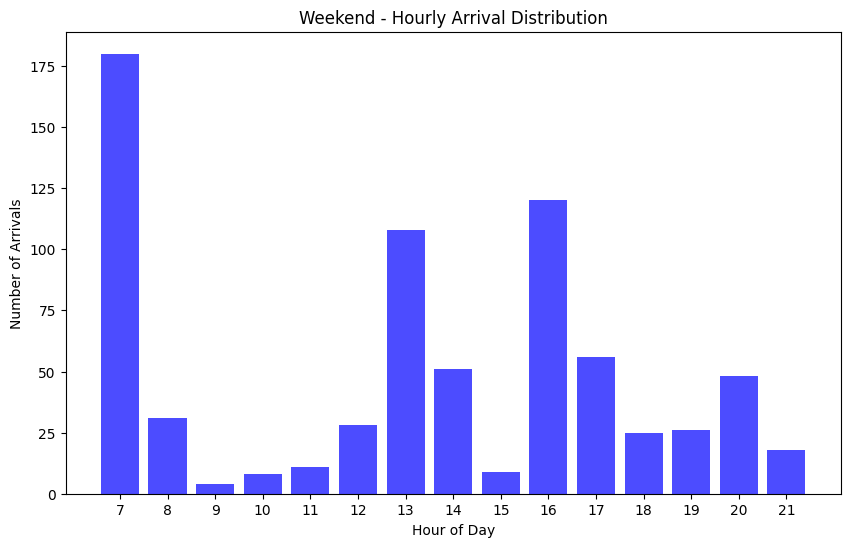

Distribution Fitting Results:
Exponential: Stat=0.1429, p-value=0.8779, Parameters=(4.0, 44.2)
Normal: Stat=0.2385, p-value=0.3093, Parameters=(48.2, 48.51693862284937)
Triangular: Stat=0.3622, p-value=0.0286, Parameters=(6.444241879804956e-08, 3.9999814678360384, 207.82648374485177)
Poisson: Stat=12924308336689854443744199258376426345755312128.0000, p-value=0.0000, Parameters=48.2

Best fitting distribution:
Exponential with parameters (4.0, 44.2)
The mean of the best fitting distribution (Exponential) is: 44.2
Weekday mean: 715.4
Weekend mean: 44.2


In [13]:

def plot_arrival_distribution_and_evaluate(group_df, label):
    # Count arrivals per hour
    hourly_arrivals = group_df.groupby('hour').size()

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.bar(hourly_arrivals.index, hourly_arrivals.values, color='blue', alpha=0.7)
    plt.title(f'{label} - Hourly Arrival Distribution')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Arrivals')
    plt.xticks(np.arange(7, 22, 1))
    plt.show()

    # Fit distributions to the hourly arrival data and evaluate
    data = hourly_arrivals.values
    results = evaluate_distribution_fits(data)
    best_fit, mean_value = print_results(results)
    
    return best_fit, mean_value

# Evaluate and plot for both weekdays and weekends
best_weekday_fit, weekday_mean = plot_arrival_distribution_and_evaluate(weekday_df, "Weekday")
best_weekend_fit, weekend_mean = plot_arrival_distribution_and_evaluate(weekend_df, "Weekend")

print(f"Weekday mean: {weekday_mean}")
print(f"Weekend mean: {weekend_mean}")


In [14]:
hourly_totals = entrada_df.groupby(['date', 'hour'])['Cant.'].sum().reset_index()
average_per_hour = hourly_totals.groupby('hour')['Cant.'].mean().reset_index()
average_per_hour.columns = ['Hour', 'Average Kits Arriving']
print(average_per_hour)

    Hour  Average Kits Arriving
0      7               7.921053
1      8               5.891892
2      9               5.576923
3     10              14.857143
4     11              24.940299
5     12              23.057143
6     13              33.579545
7     14              17.528736
8     15              16.030769
9     16              11.253012
10    17               9.763889
11    18               5.736842
12    19               5.604167
13    20               4.259259
14    21               3.540541


14.345218803579138
11.404527333741079


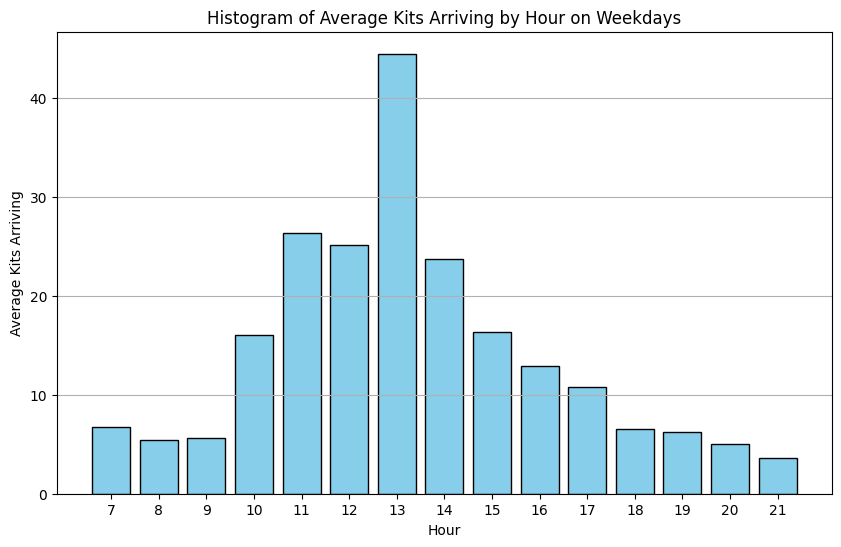

In [15]:
hourly_totals = weekday_df.groupby(['date', 'hour'])['Cant.'].sum().reset_index()

average_per_hour = hourly_totals.groupby('hour')['Cant.'].mean().reset_index()

average_per_hour.columns = ['Hour', 'Average Kits Arriving']

print(average_per_hour['Average Kits Arriving'].mean())
print(average_per_hour['Average Kits Arriving'].std())

plt.figure(figsize=(10, 6))
plt.bar(average_per_hour['Hour'], average_per_hour['Average Kits Arriving'], color='skyblue', edgecolor='black')

plt.xlabel('Hour')
plt.ylabel('Average Kits Arriving')
plt.title('Histogram of Average Kits Arriving by Hour on Weekdays')

plt.xticks(average_per_hour['Hour'])  
plt.grid(axis='y')  
plt.show()

3.9323299663299656
1.6554169240920076


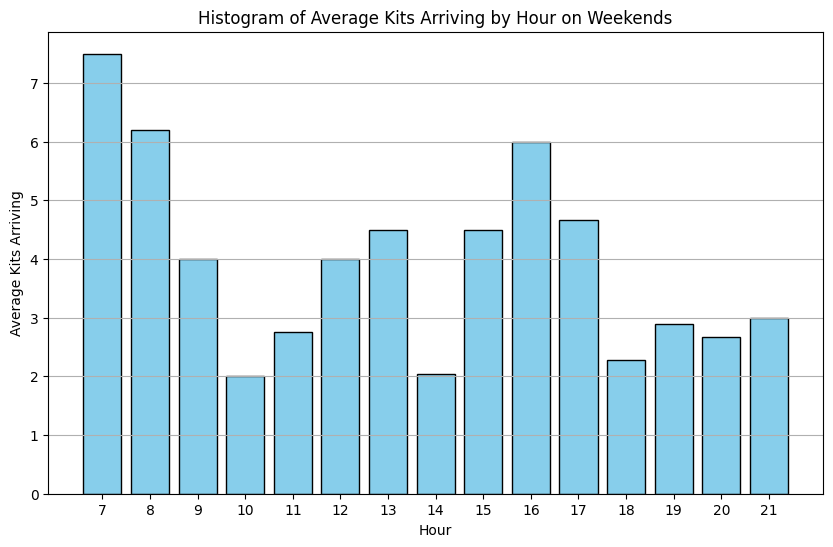

In [16]:
hourly_totals = weekend_df.groupby(['date', 'hour'])['Cant.'].sum().reset_index()

average_per_hour = hourly_totals.groupby('hour')['Cant.'].mean().reset_index()

average_per_hour.columns = ['Hour', 'Average Kits Arriving']

print(average_per_hour['Average Kits Arriving'].mean())
print(average_per_hour['Average Kits Arriving'].std())

plt.figure(figsize=(10, 6))
plt.bar(average_per_hour['Hour'], average_per_hour['Average Kits Arriving'], color='skyblue', edgecolor='black')

plt.xlabel('Hour')
plt.ylabel('Average Kits Arriving')
plt.title('Histogram of Average Kits Arriving by Hour on Weekends')

plt.xticks(average_per_hour['Hour'])  
plt.grid(axis='y')  
plt.show()